In [ ]:
# GBA 462 Lab 5

# Liuyi Ye / Xinyi Wang

# 10/10/2023

Case Study: Comparative Evaluation (Similar to HW4)

You work for a private jet brokerage and your job is to bring sellers and buyers of private jets together and
make deals happen. On your bulletin board, a private jet named NotSoEnvironmentallyFriendly is currently
for sale. The jet is built in **2012** (we are now in 2022), weighs **344K** tons, with Aindex being **37437**.
You want to develop a better understanding of how private jet prices are associated with different factors so
that you can better evaluate this NotSoEnvironmentallyFriendly jet and find more ideal buyers. To achieve
this purpose, you conduct some regression analyses, using a proprietary dataset (**lab_data.csv**) which contains
48 private jets’ selling prices, and three attributes (**i.e., Year Built (Age),Weight,Aindex**) that matter the
most for the price evaluation.
1. What is the expected relationship between private jets’ selling prices and each of these three attributes?
Are there any other important private jet price predictors you can think of?
2. Conduct a multiple regression analysis of private jet prices with all of the three attributes. How well
does the model fit?
3. Based on the results of your multiple regression analysis, what is the predicted price for NotSoEnvironmentallyFriendly? Construct a 95% prediction interval for the jet’s own price. Also, construct a 95%
confidence interval for the price of an average jet just like NotSoEnvironmentallyFriendly.
4. In each of the following cases where one attribute changes while other two remains unchanged, what
would be predicted price for NotSoEnvironmentallyFriendly?
• What if the jet were **5 years younger**?
• What if it were 20K **tons lighter**?
• What if the Aindex were **20%** lower?


In [ ]:
## import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
## read data and check variable names
lab_data = pd.read_csv("lab_data.csv")
lab_data.head()

,AirPlane,SaleData,SalePrice,YrBuilt,Age,Weight,Aindex
0,1,Jan-07,730,2014,8,340.4,13941
1,2,Jan-07,450,2006,16,300.4,13941
2,3,Jan-07,620,2010,12,302.2,13941
3,4,Jan-07,600,2010,12,316.0,13941
4,5,Jan-07,610,2008,14,349.4,13941


1. Selling price and attributes

  Hints:
I would expect private jet sale prices to increase with the jet’s size and charter costs and decrease with the
jet’s age.
• Reasons for why you expect relationships like these? This would be very context-specific! (which means you really need to refer to/tailor to the your specific context — how does a certain predictor matters for the outcome that you are looking at)

  There are lots of possible candidates that can be important in predicting private jet prices in addition to age, size, and charter costs

  Again, super context-specific!

  say something sensible here. Identify another 2 or 3 predictors and explain the predictors’ roles

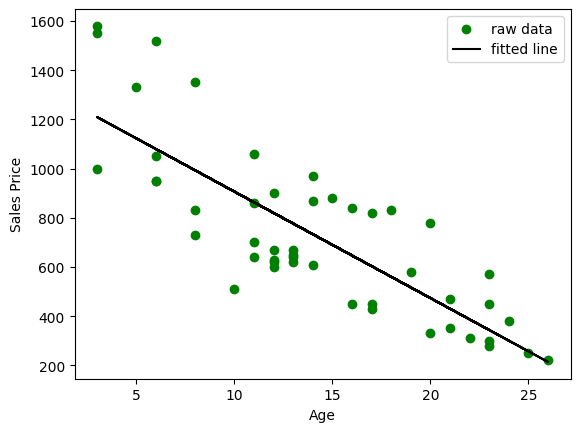

In [ ]:

est1 = smf.ols(formula='SalePrice ~ Age', data=lab_data).fit()
SalesPrice_pred = est1.predict(lab_data['Age'])

plt.scatter(lab_data['Age'], lab_data['SalePrice'],color='g', label='raw data')
plt.plot(lab_data['Age'], SalesPrice_pred,color='k', label='fitted line')
plt.xlabel('Age')
plt.ylabel('Sales Price')
plt.legend()
plt.show()



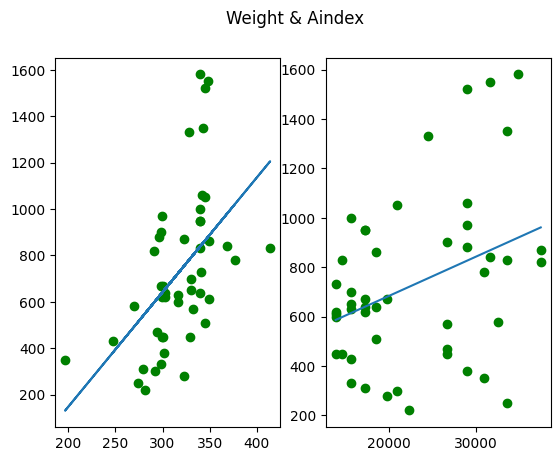

In [ ]:
# plot figures horizontally

est2 = smf.ols(formula='SalePrice ~ Weight', data=lab_data).fit()
est3 = smf.ols(formula='SalePrice ~ Aindex', data=lab_data).fit()


y2 = est2.predict(lab_data['Weight'])
y3= est3.predict(lab_data['Aindex'])

fig, (ax1, ax2) = plt.subplots(1, 2)



fig.suptitle('Weight & Aindex')
ax1.scatter(lab_data['Weight'], lab_data['SalePrice'],color='green')
ax1.plot(lab_data['Weight'], y2)


ax2.scatter(lab_data['Aindex'], lab_data['SalePrice'],color='green')
ax2.plot(lab_data['Aindex'], y3)



In [ ]:

est1 = smf.ols(formula='SalePrice ~ Age', data=lab_data).fit()
SalesPrice_pred = est1.predict(lab_data['Age'])

plt.scatter(lab_data['Age'], lab_data['SalePrice'],color='g', label='raw data')
plt.plot(lab_data['Age'], SalesPrice_pred,color='k', label='fitted line')
plt.xlabel('Age')
plt.ylabel('Sales Price')
plt.legend()
plt.show()



2. multiple reg

In [ ]:
## 2. run regression analysis
est = smf.ols(formula='SalePrice ~ Age + Weight + Aindex', data=lab_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.43e-23
Time:                        17:39:11   Log-Likelihood:                -288.07
No. Observations:                  48   AIC:                             584.1
Df Residuals:                      44   BIC:                             591.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    476.9555    170.698      2.794      0.0

    R2 is 0.915, so the three factors explain the sales price quite well

3. 95% prediction interval for the jet’s own price +  the price of an average jet

In [ ]:
# compute the predicted price of NotSoEnvironmentallyFriendly
predict_x = {'Age': [10], 'Weight': [344], 'Aindex': [37437]}
df = pd.DataFrame(data=predict_x)
predictions = est.get_prediction(df)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1266.727978,35.75114,1194.67629,1338.779666,1048.707802,1484.748153


In [ ]:
est.predict(df)

0    1266.727978
dtype: float64

     The predicted price is 1266.728 ;
     The confidence interval for average prediction is (1194.676, 1338.78)
     The prediction interval for specific prediction is (1048.708, 1484.748)

4. Prediction

In [ ]:
#the predicted price if the jet's age were 5 (5 years younger than 10 yrs old)

predict_x = {'Age': [5], 'Weight': [344], 'Aindex': [37437]}
df = pd.DataFrame(data=predict_x)
predictions = est.get_prediction(df)
predictions.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1491.329365,42.070192,1406.542464,1576.116266,1268.775619,1713.883111


In [ ]:
df

,Age,Weight,Aindex
0,5,344,37437


In [ ]:
# or just use
est.predict(predict_x)

0    1491.329365
dtype: float64

In [ ]:

# 20k ton lighter

predict_x = {'Age': [10], 'Weight': [324], 'Aindex': [37437]}
df = pd.DataFrame(data=predict_x)
predictions = est.get_prediction(df)
predictions.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1243.107812,36.101376,1170.35027,1315.865354,1024.853348,1461.362276


In [ ]:
# the predicted price if the jet's Aindex were 37437*0.8 (20% lower)


predict_x = {'Age': [10], 'Weight': [344], 'Aindex': [37437 * 0.8]}
df = pd.DataFrame(data=predict_x)
predictions = est.get_prediction(df)
predictions.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1100.186305,24.294135,1051.224692,1149.147918,888.671316,1311.701294
